In [2]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

/tmp/ipykernel_2047238/1335367459.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axB.set_xticklabels(axB.get_xticklabels(), rotation=30, ha="right")


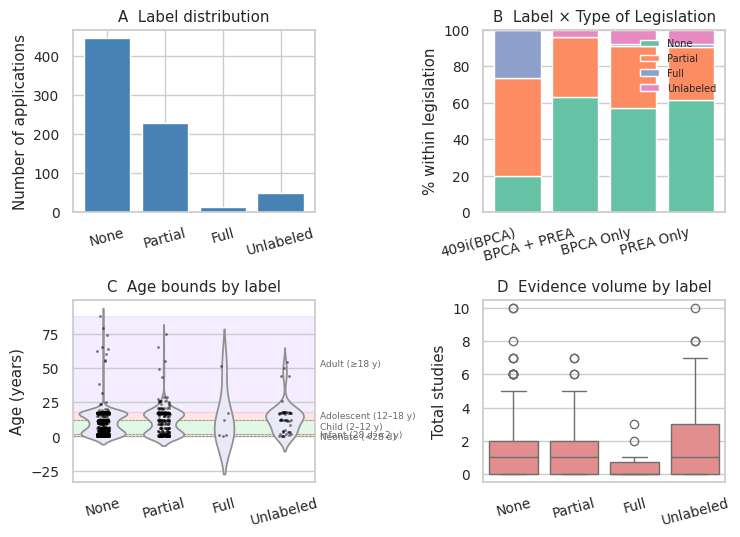

In [8]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

##############################################################################
# 0.  load
##############################################################################
REPO_ROOT = Path.cwd().parent   
DATA_DIR   = REPO_ROOT /  "outputs"
df = pd.read_csv(DATA_DIR / "pedx_dataset.csv")
df['label'] = df['label'].str.replace('NotExtrapolated', 'None')
df = df.rename(columns={"total_studies_x": "total_studies"})

##############################################################################
# 1.  pre-calc things we’ll reuse
##############################################################################
order = ["None", "Partial", "Full", "Unlabeled"]

label_counts = (df["label"].value_counts()
                           .reindex(order, fill_value=0))

# panel B ─ proportion of each label within every legislation bucket
legis = (df.groupby(["Type of Legislation", "label"])
           .size()
           .unstack(fill_value=0)
           .loc[:, order])
legis_prop = legis.div(legis.sum(axis=1), axis=0)  # convert to %
legis_prop = legis_prop.sort_index()               # nicer ordering

##############################################################################
# 2.  make the figure
##############################################################################
sns.set_theme(style="whitegrid", font_scale=0.9)
fig, axs = plt.subplots(2, 2, figsize=(7.5, 5.5))
(axA, axB), (axC, axD) = axs

# ── Panel A – label counts ────────────────────────────────────────────────
bars = axA.bar(label_counts.index, label_counts.values, color="steelblue")
axA.set_ylabel("Number of applications")
axA.set_title("A  Label distribution")

# ── Panel B – 100 % stacked bar by legislation ───────────────────────────
bottom = np.zeros(len(legis_prop))
colors = sns.color_palette("Set2", n_colors=len(order))
for col, c in zip(order, colors):
    axB.bar(legis_prop.index, legis_prop[col]*100,
            bottom=bottom, label=col, color=c)
    bottom += legis_prop[col]*100
axB.set_ylabel("% within legislation")
axB.set_xticklabels(axB.get_xticklabels(), rotation=30, ha="right")
axB.set_title("B  Label × Type of Legislation")
axB.legend(frameon=False, loc="upper right", fontsize=7)

# ── Panel C – violin / swarm of age range vs. label ──────────────────────
age_long = (df.melt(id_vars="label", value_vars=["age_min", "age_max"],
                    var_name="bound", value_name="age_years")
              .dropna())

# ---- Highlight paediatric stages ---------------------------------
# ---- Highlight paediatric stages ---------------------------------
ped_bands = [
    ("Neonate (<28 d)",        0,     0.076),
    ("Infant (28 d–<2 y)",   0.076,   2),
    ("Child (2–12 y)",         2,    12),
    ("Adolescent (12–18 y)",  12,    18),
    ("Adult (≥18 y)",         18,  age_long["age_years"].max())
]

band_colors = sns.color_palette("pastel", n_colors=len(ped_bands))

for (stage, y0, y1), col in zip(ped_bands, band_colors):
    axC.axhspan(y0, y1, color=col, alpha=0.25, zorder=0)

    # place label *just* to the right of the plotting area
    axC.text(
        1.02,                                   # x = 102 % of axis width
        (y0 + y1) / 2,                          # y = middle of the band
        stage,
        transform=axC.get_yaxis_transform(),    # axis-fraction coords
        va="center", ha="left",
        fontsize=6.5, color="dimgray"
    )



# Optional: thin dashed separators
for _, y0, y1 in ped_bands[1:-1]:            # skip bottom & top edges
    axC.axhline(y0, color="gray", ls="--", lw=0.5, zorder=1)

sns.violinplot(ax=axC, data=age_long, x="label", y="age_years",
               order=order, inner=None, color="lavender")
sns.stripplot(ax=axC, data=age_long, x="label", y="age_years",
              order=order, size=2, color="black", alpha=0.5)
axC.set_ylabel("Age (years)")
axC.set_xlabel("")
axC.set_title("C  Age bounds by label")

# ── Panel D – boxplot of total_studies ───────────────────────────────────
sns.boxplot(ax=axD, data=df, x="label", y="total_studies",
            order=order, color="lightcoral")
# axD.set_yscale("log")
axD.set_xlabel("")
axD.set_ylabel("Total studies")
axD.set_title("D  Evidence volume by label")

# global tweaks
for ax in axs.flat:
    ax.tick_params(axis="x", rotation=15)
fig.tight_layout()
plt.show()


In [2]:
df.columns

Index(['canon_id', 'kind', 'root', 'supplement', 'Product Labeling Link',
       'label', 'is_gold', 'peds_study_type', 'efficacy_summary', 'pk_summary',
       'rationale', 'confidence', 'Pediatric Labeling Approval Date',
       'Trade Name', 'Generic Name', 'Type of Legislation', 'Indication',
       'Indication(s) Studied', 'Therapeutic Category', 'Dosage Form(s)',
       'Route(s) of Administration', 'Pharmacological Class',
       'Labeling Change Summary', 'age_min', 'age_max', 'total_studies',
       'Efficacy', 'Safety', 'Pharmacokinetic', 'Pharmacodynamic',
       'Tolerability', 'Other_Type', 'Randomized_DoubleBlind',
       'Randomized_SingleBlind', 'Open_Label', 'Placebo_Control',
       'Active_Comparator', 'Dose_Escalation', 'Population_PK', 'Other_Design',
       'Studied in Neonates', 'Indicated in Neonates', 'Number of Centers',
       'Number of Countries', 'Patients Analyzed', 'Patients Enrolled',
       'Total #  of American Indian/Alaska Native', 'Total #  of Asia

In [3]:
df['Route(s) of Administration'].value_counts()

Route(s) of Administration
ORAL                                  277
INTRAVENOUS                           107
TOPICAL                                50
SUBCUTANEOUS                           44
INHALATION                             32
ORAL_x000D_\nORAL                      27
INTRAMUSCULAR                          24
NASAL                                  22
OPHTHALMIC                             21
INJECTION                               8
ORAL_x000D_\nORAL_x000D_\nORAL          7
OTIC                                    5
VAGINAL                                 4
SUBLINGUAL                              3
ENDOCERVICAL                            3
TRANSDERMAL                             3
ORAL_x000D_\nINTRAVENOUS                2
IRRIGATION                              2
TOPICAL_x000D_\nTOPICAL                 2
IV (INFUSION)                           2
INTRAUTERINE                            2
TRANSDERMAL_x000D_\nTRANSDERMAL         2
INTRA-ARTERIAL                          2
INJECTI

/tmp/ipykernel_2047238/2549486214.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(ax=axC, data=age_long, x="label", y="age_years",
/tmp/ipykernel_2047238/2549486214.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axD, data=df, x="label", y="total_studies",


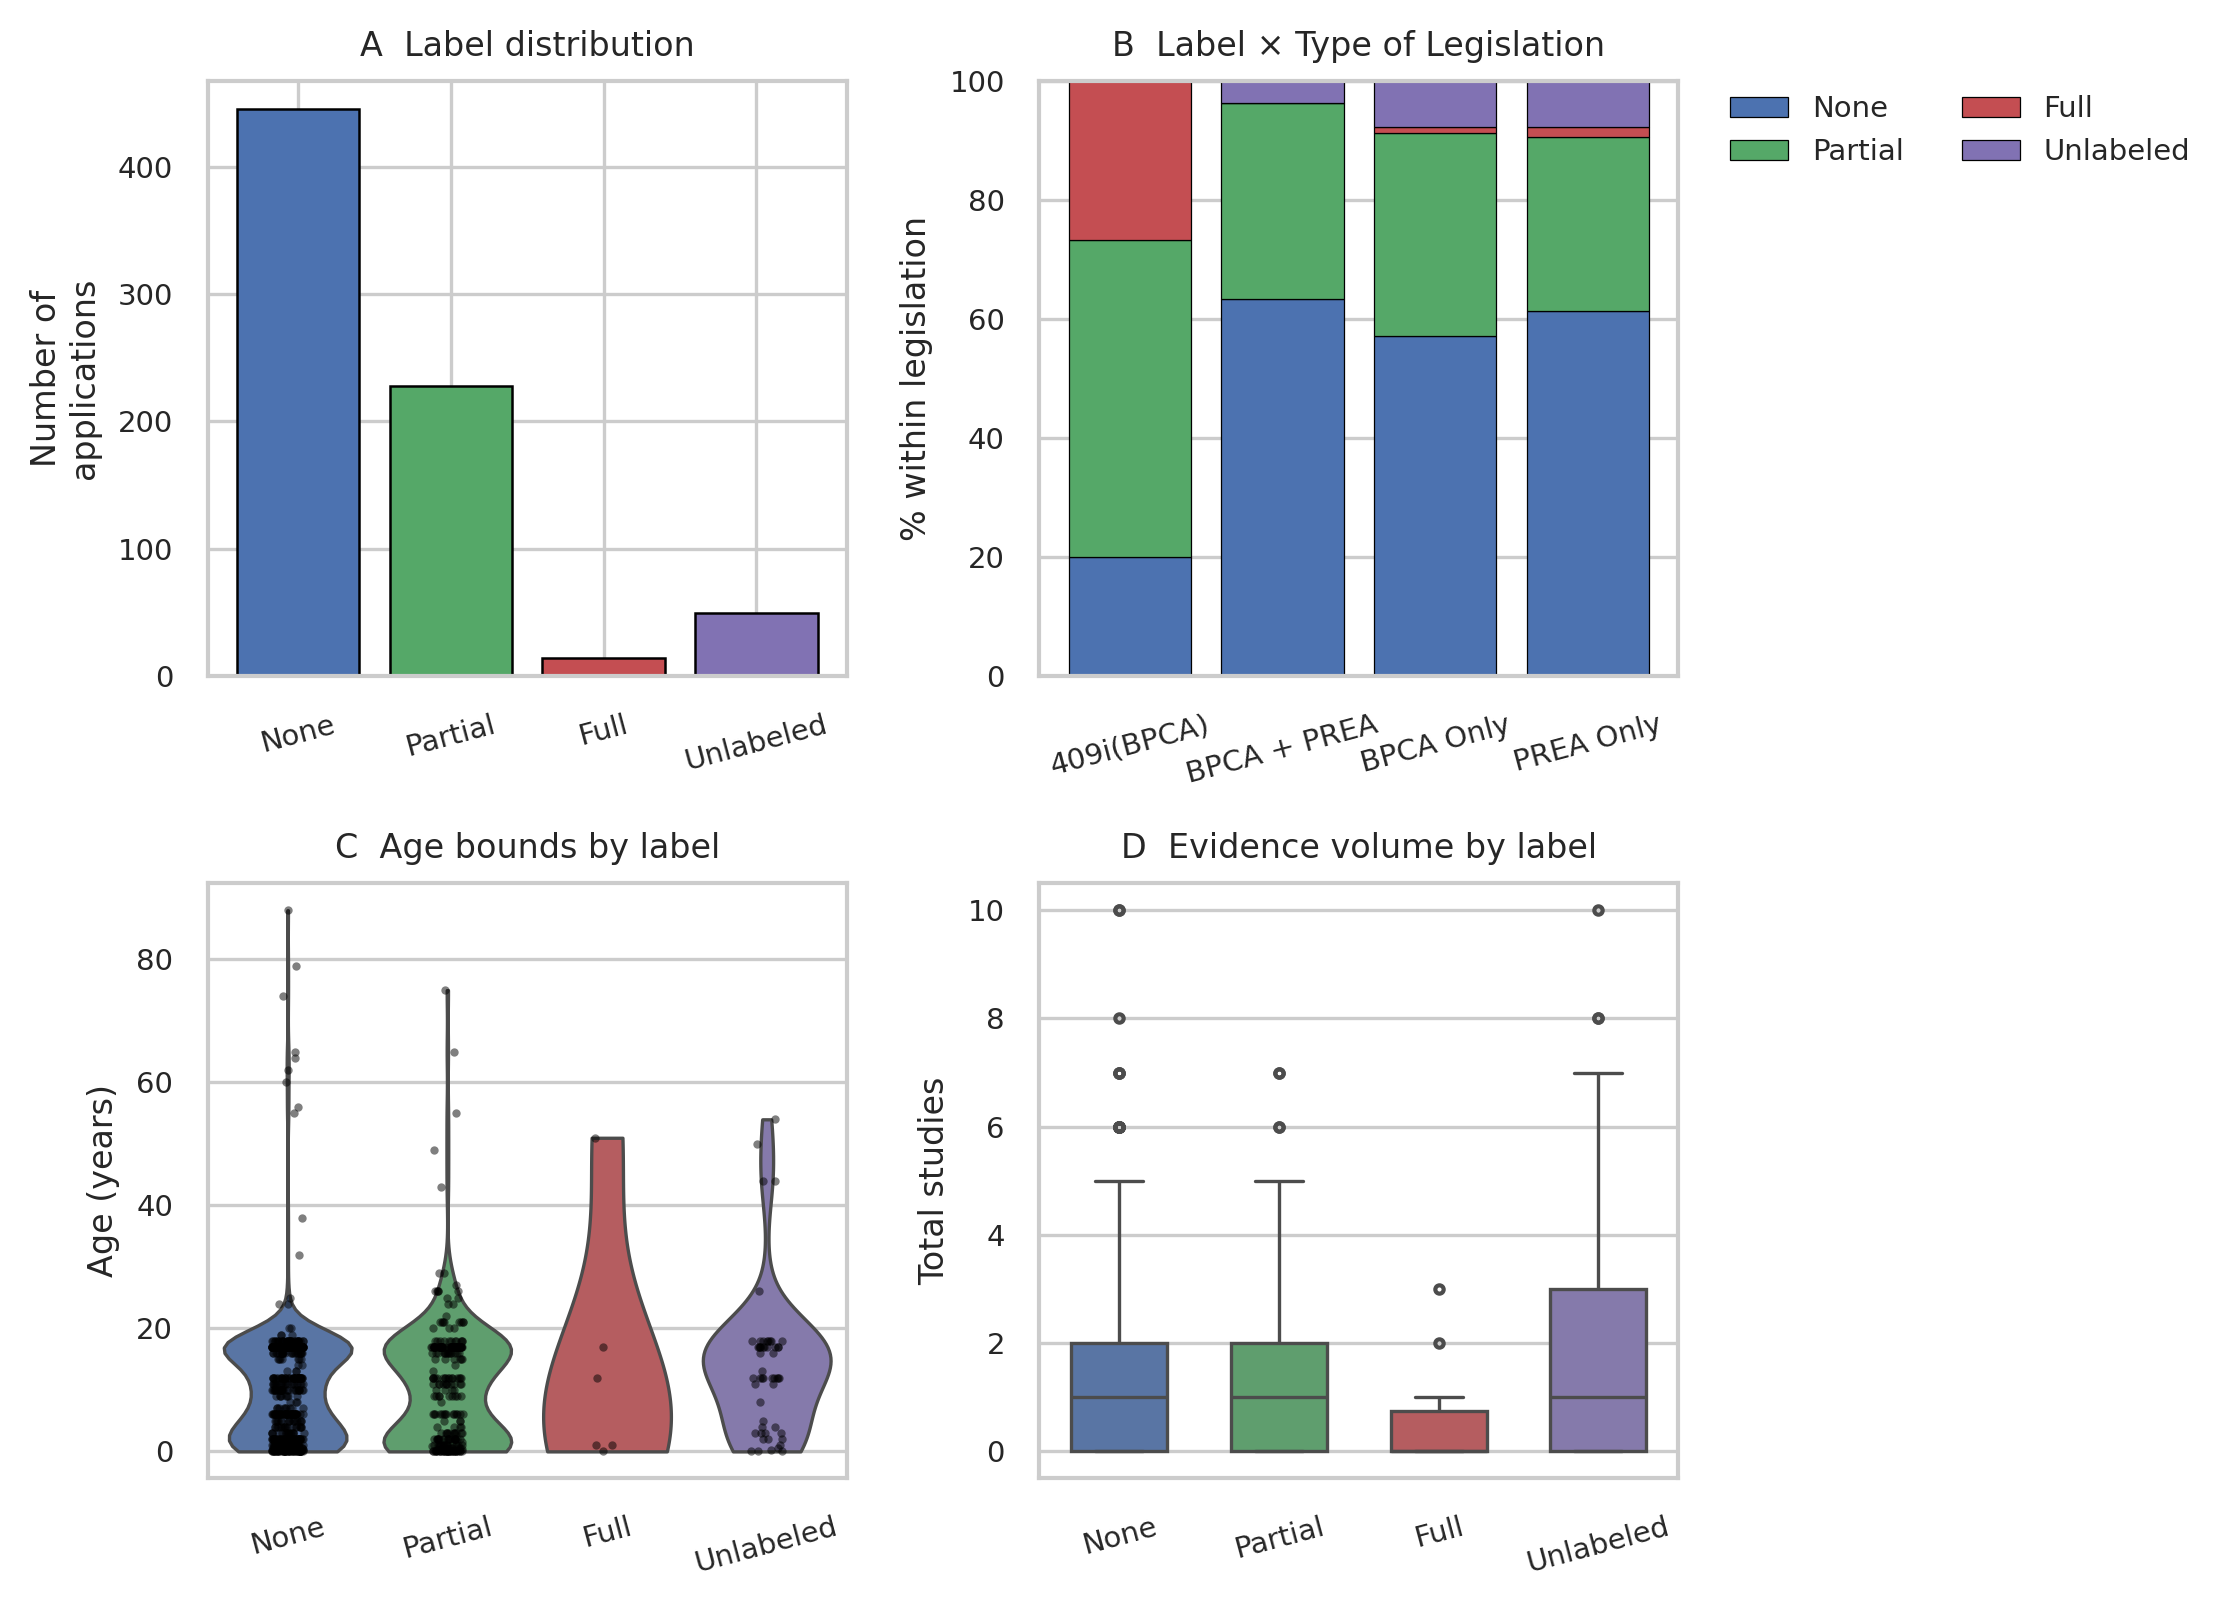

In [16]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import matplotlib as mpl

# ───────────────────── 0. load & tidy ────────────────────────────
REPO_ROOT = Path.cwd().parent        # adjust if needed
DATA_DIR  = REPO_ROOT / "outputs"
df = pd.read_csv(DATA_DIR / "pedx_dataset.csv")

df["label"] = df["label"].replace({"NotExtrapolated": "None"})
df = df.rename(columns={"total_studies_x": "total_studies"})
for c in ["age_min", "age_max", "total_studies"]:
    df[c] = pd.to_numeric(df[c], errors="coerce")

order = ["None", "Partial", "Full", "Unlabeled"]

label_counts = df["label"].value_counts().reindex(order, fill_value=0)
legis_prop = (
    df.groupby(["Type of Legislation", "label"]).size()
      .unstack(fill_value=0).loc[:, order]
      .pipe(lambda t: t.div(t.sum(axis=1), axis=0))
      .sort_index()
)
age_long = (
    df.melt(id_vars="label", value_vars=["age_min", "age_max"],
            var_name="bound", value_name="age_years")
      .dropna()
)

# ───────────────────── 1. style  ────────────────────────────────
sns.set_theme(context="paper", style="whitegrid")
mpl.rcParams.update({
    "font.size": 8, "axes.titlesize": 8, "axes.labelsize": 8,
    "legend.fontsize": 7, "xtick.labelsize": 7, "ytick.labelsize": 7,
})

palette   = ["#4C72B0", "#55A868", "#C44E52", "#8172B3"]
label2col = dict(zip(order, palette))

# ───────────────────── 2. figure  ───────────────────────────────
fig, ax_arr = plt.subplots(2, 2, figsize=(7.5, 5.4), dpi=300)
axA, axB, axC, axD = ax_arr.flatten()

# A • counts
axA.bar(label_counts.index, label_counts.values,
        color=[label2col[l] for l in order],
        edgecolor="black", linewidth=.6)
axA.set_ylabel("Number of\napplications")
axA.set_title("A  Label distribution")

# B • stacked %
bottom = np.zeros(len(legis_prop))
for lab in order:
    vals = legis_prop[lab].values * 100
    axB.bar(legis_prop.index, vals, bottom=bottom,
            color=label2col[lab], edgecolor="black", linewidth=.3, label=lab)
    bottom += vals
axB.set_ylabel("% within legislation")
axB.set_title("B  Label × Type of Legislation")
axB.tick_params(axis="x", rotation=25)
axB.legend(frameon=False, ncol=2, bbox_to_anchor=(1.04, 1.02))

# C • age violins (no background bands)
sns.violinplot(ax=axC, data=age_long, x="label", y="age_years",
               order=order, palette=[label2col[l] for l in order],
               inner=None, linewidth=.8, cut=0)
sns.stripplot(ax=axC, data=age_long, x="label", y="age_years",
              order=order, size=2, color="black", alpha=.5)
axC.set_ylabel("Age (years)")
axC.set_xlabel("")
axC.set_title("C  Age bounds by label")

# D • total studies boxplot
sns.boxplot(ax=axD, data=df, x="label", y="total_studies",
            order=order, palette=[label2col[l] for l in order],
            width=.6, fliersize=2, linewidth=.8)
axD.set_ylabel("Total studies")
axD.set_xlabel("")
axD.set_title("D  Evidence volume by label")
# axD.set_yscale("log")  # optional

# tidy & export
for ax in ax_arr.flatten():
    ax.tick_params(axis="x", rotation=15)
fig.tight_layout(w_pad=1.6, h_pad=1.3)
fig.savefig("pedx_figure.png", dpi=600, bbox_inches="tight")
plt.show()


In [17]:
FIG_DIR = REPO_ROOT / "figures"
FIG_DIR.mkdir(parents=True, exist_ok=True)          # create if it doesn’t exist

out_path = FIG_DIR / "dataset_overview.png"
fig.savefig(out_path, dpi=300, bbox_inches="tight") # ← high-res, cropped
print(f"✓ Figure written to {out_path}")


✓ Figure written to /data1/home/srinivasana/PedXBench/figures/dataset_overview.png


/tmp/ipykernel_3759525/856471475.py:87: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


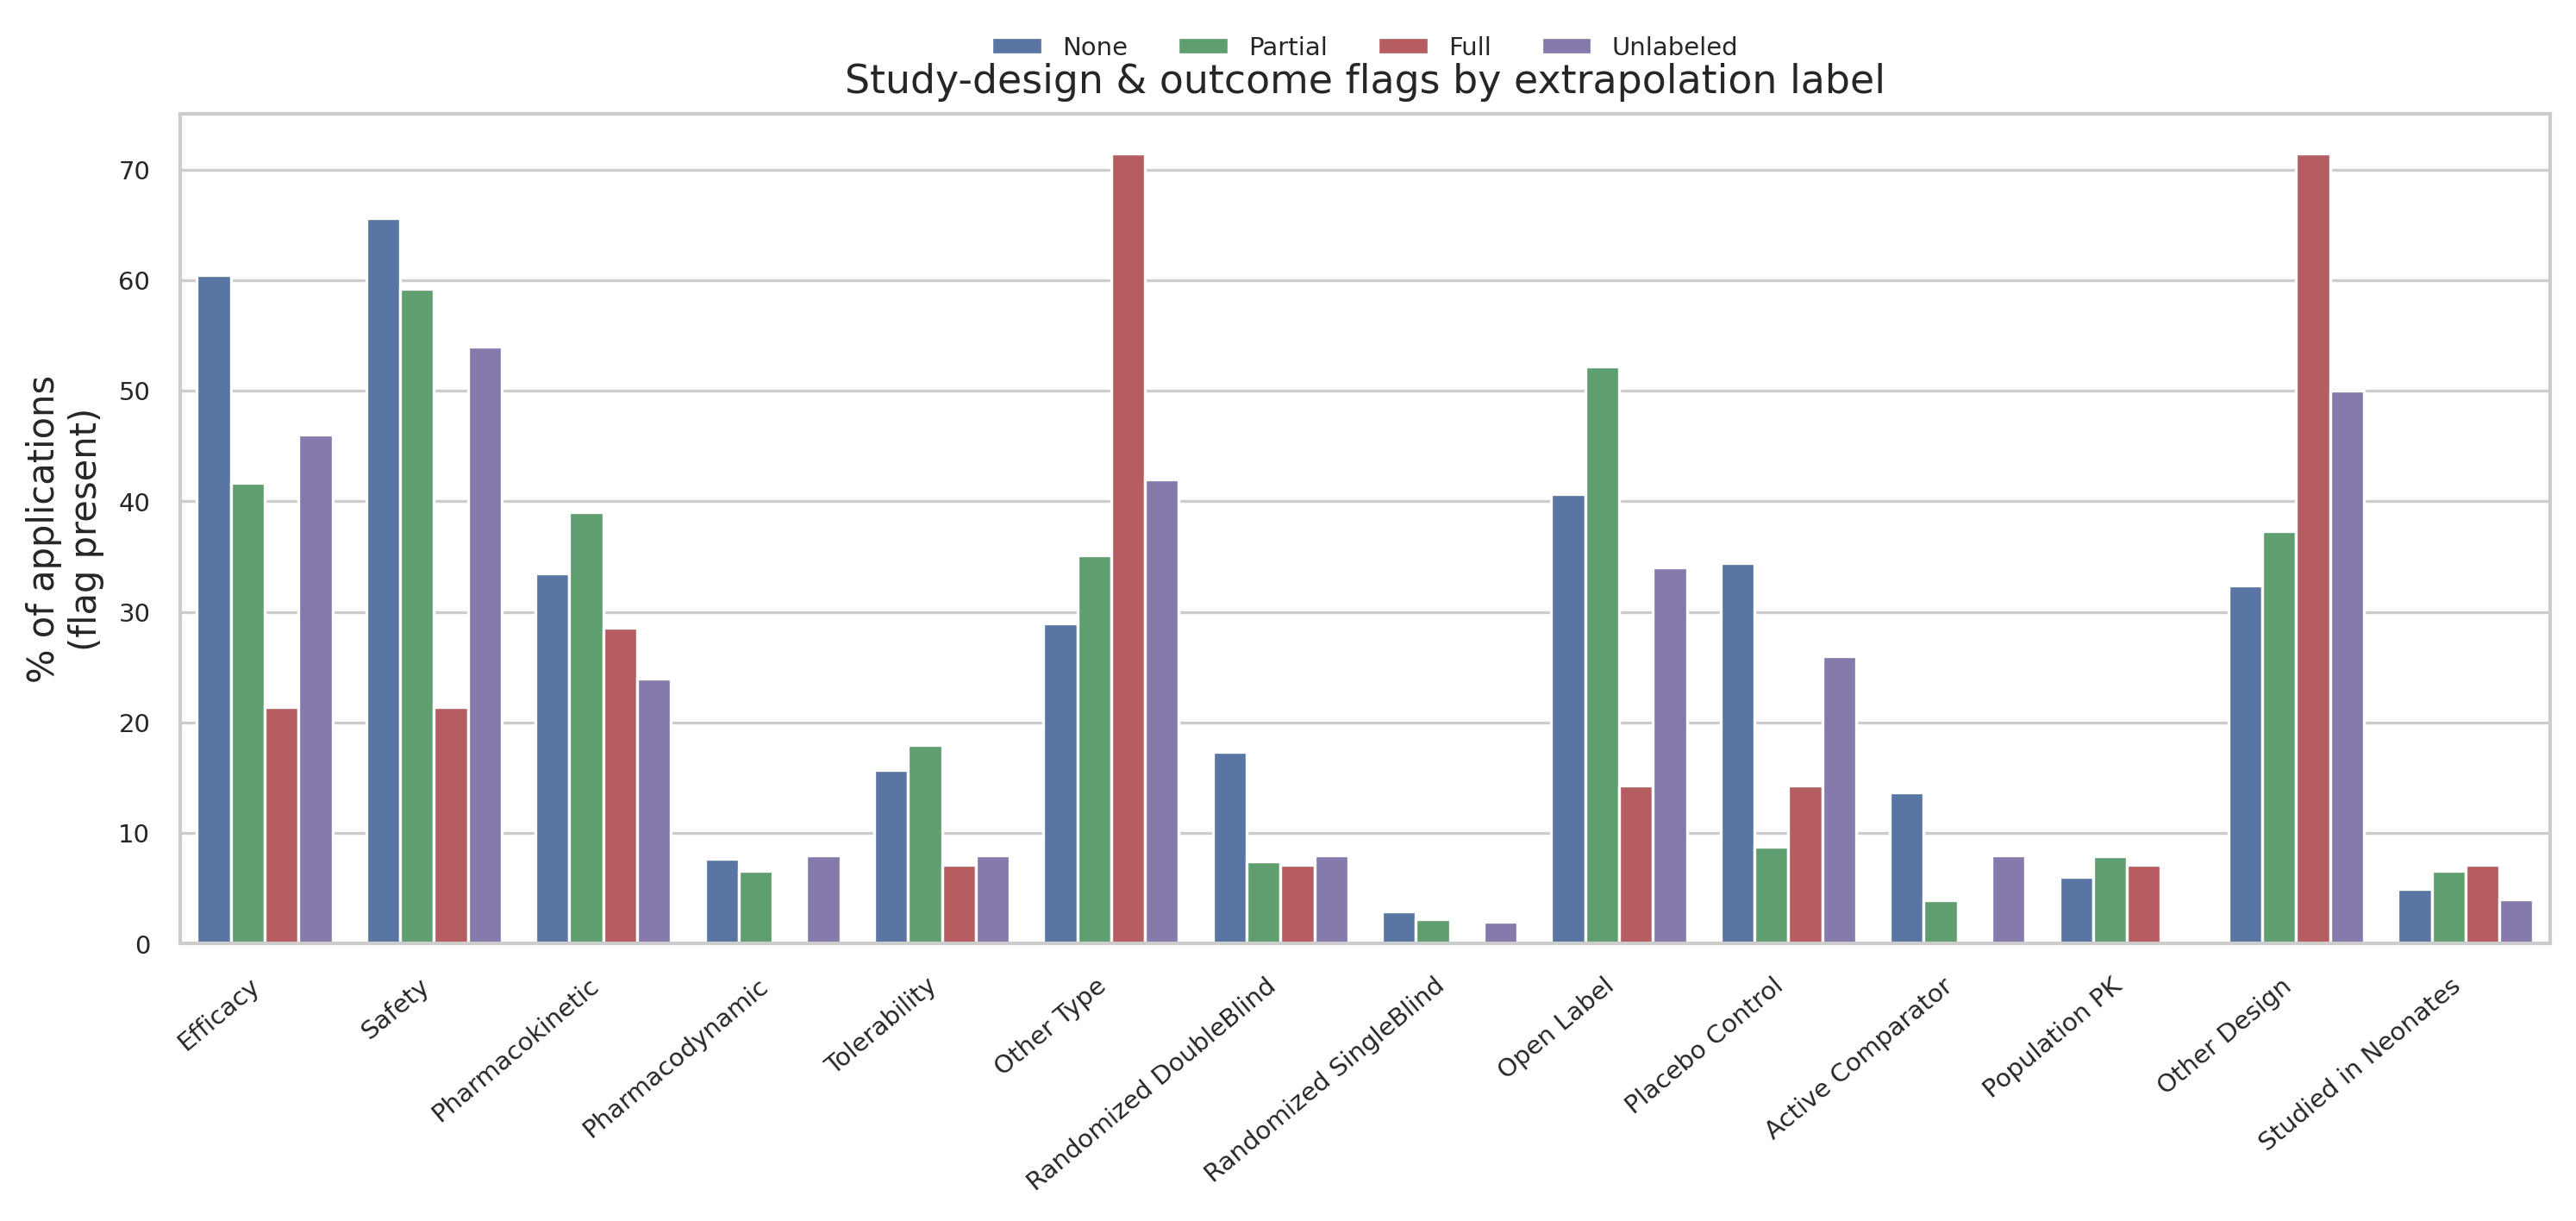

In [1]:
import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import matplotlib as mpl

# ───────────────────── 0.  load & basic tidy ─────────────────────
REPO_ROOT = Path.cwd().parent
DATA_DIR  = REPO_ROOT / "outputs"
df = pd.read_csv(DATA_DIR / "pedx_dataset.csv")

df["label"] = df["label"].replace({"NotExtrapolated": "None"})
df = df.rename(columns={"total_studies_x": "total_studies"})

flag_cols = [
    # ---- outcome / data type flags -------------------------------------
    "Efficacy", "Safety", "Pharmacokinetic", "Pharmacodynamic",
    "Tolerability",                     # (rare; often folded into Safety)
    "Other_Type",                      # (catch-all; consider dropping)
    # ---- study-design flags --------------------------------------------
    "Randomized_DoubleBlind",
    "Randomized_SingleBlind",          # (could merge with DoubleBlind -> Randomized)
    "Open_Label",
    "Placebo_Control",
    "Active_Comparator",
    # "Dose_Escalation",                 # (phase-I dose-finding escalation)
    "Population_PK",                   # (PK modelling across pop; keep – distinct)
    "Other_Design",                    # (catch-all; may drop)
    # ---- special population flag ---------------------------------------
    "Studied in Neonates"              # (keep; clinically meaningful)
]

# ----- optional pruning suggestions -------------------------------------
# • Drop "Other_Type" and "Other_Design" if they’re sparsely populated.
# • Merge both Randomized_* columns into a single "Randomized" flag if you
#   don't need the blind distinction.  The code below keeps them separate.

# ----- ensure integer 0/1 and fill NaNs ---------------------------------
df[flag_cols] = df[flag_cols].fillna(0).astype(int)

order = ["None", "Partial", "Full", "Unlabeled"]

# ───────────────────── 1.  aggregate % by label ──────────────────
agg = (
    df.groupby("label")[flag_cols]
      .mean()               # fraction of apps where flag == 1
      .mul(100)             # convert to percentage
      .reindex(order)
      .transpose()
)

# ───────────────────── 2.  tidy → long form  ─────────────────────
pretty_flags = [f.replace("_", " ") for f in flag_cols]
pretty_map   = dict(zip(flag_cols, pretty_flags))

plot_df = (
    agg.reset_index()
       .melt(id_vars="index", value_vars=order,
             var_name="Label", value_name="Percent")
       .rename(columns={"index": "Flag"})
)

plot_df["Flag"]  = plot_df["Flag"].map(pretty_map)
plot_df["Flag"]  = pd.Categorical(plot_df["Flag"],
                                  categories=pretty_flags, ordered=True)

# ───────────────────── 3.  plot settings  ───────────────────────
sns.set_theme(context="paper", style="whitegrid")
mpl.rcParams.update({
    "font.size": 8, "axes.titlesize": 11, "axes.labelsize": 10,
    "legend.fontsize": 7, "xtick.labelsize": 7, "ytick.labelsize": 7,
})

palette = ["#4C72B0", "#55A868", "#C44E52", "#8172B3"]

# ───────────────────── 4.  clustered bar plot  ───────────────────
fig, ax = plt.subplots(figsize=(10, 4.8), dpi=300)
sns.barplot(
    data=plot_df,
    x="Flag", y="Percent", hue="Label",
    order=pretty_flags, hue_order=order,
    palette=palette, ax=ax
)

ax.set_ylabel("% of applications\n(flag present)")
ax.set_xlabel("")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title("Study-design & outcome flags by extrapolation label", pad=6)
ax.legend(frameon=False, title="", ncol=4, bbox_to_anchor=(0.5, 1.08),
          loc="center", borderaxespad=0.)

fig.tight_layout()
fig.savefig("pedx_flag_clustered_bar.png", dpi=600, bbox_inches="tight")
plt.show()


In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

##############################################################################
# 0.  load
##############################################################################
REPO_ROOT = Path.cwd().parent   
DATA_DIR   = REPO_ROOT /  "outputs"
df = pd.read_csv(DATA_DIR / "pedx_dataset.csv")
df['label'] = df['label'].str.replace('NotExtrapolated', 'None')
df = df.rename(columns={"total_studies_x": "total_studies"})

In [2]:
df.columns

Index(['canon_id', 'kind', 'root', 'supplement', 'Product Labeling Link',
       'label', 'is_gold', 'peds_study_type', 'efficacy_summary', 'pk_summary',
       'rationale', 'confidence', 'Pediatric Labeling Approval Date',
       'Trade Name', 'Generic Name', 'Type of Legislation', 'Indication',
       'Indication(s) Studied', 'Therapeutic Category', 'Dosage Form(s)',
       'Route(s) of Administration', 'Pharmacological Class',
       'Labeling Change Summary', 'age_min', 'age_max', 'total_studies',
       'Efficacy', 'Safety', 'Pharmacokinetic', 'Pharmacodynamic',
       'Tolerability', 'Other_Type', 'Randomized_DoubleBlind',
       'Randomized_SingleBlind', 'Open_Label', 'Placebo_Control',
       'Active_Comparator', 'Dose_Escalation', 'Population_PK', 'Other_Design',
       'Studied in Neonates', 'Indicated in Neonates', 'Number of Centers',
       'Number of Countries', 'Patients Analyzed', 'Patients Enrolled',
       'Total #  of American Indian/Alaska Native', 'Total #  of Asia

In [3]:
import pandas as pd

# Absolute counts
counts = df["label"].value_counts()

# Percentage distribution
percent = df["label"].value_counts(normalize=True).mul(100).round(1)

# Combine for a tidy summary
label_stats = pd.concat([counts, percent], axis=1)
label_stats.columns = ["count", "percent"]

print(label_stats)


           count  percent
label                    
None         445     60.4
Partial      228     30.9
Unlabeled     50      6.8
Full          14      1.9
